In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
users = pd.read_csv('../IR Project/BX-Users.csv')
users.head(10)

,uid,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,9,"germantown, tennessee, usa",NaN
7,11,"melbourne, victoria, australia",14.0
8,12,"fort bragg, california, usa",NaN
9,13,"barcelona, barcelona, spain",26.0


In [3]:
book_ratings = pd.read_csv('../IR Project/BX-Book-Ratings.csv')
book_ratings.head(10)

,uid,isbn,rating
0,2,0195153448,0
1,8,0002005018,5
2,11400,0002005018,0
3,11676,0002005018,8
4,41385,0002005018,0
5,67544,0002005018,8
6,85526,0002005018,0
7,96054,0002005018,0
8,116866,0002005018,9
9,123629,0002005018,9


In [4]:
merged_dataset = pd.merge(users, book_ratings, on='uid')
merged_dataset.head(10)

,uid,location,age,isbn,rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,9,"germantown, tennessee, usa",NaN,0440234743,0
2,9,"germantown, tennessee, usa",NaN,0452264464,6
3,9,"germantown, tennessee, usa",NaN,0609804618,0
4,12,"fort bragg, california, usa",NaN,1879384493,10
5,14,"mediapolis, iowa, usa",NaN,0061076031,5
6,14,"mediapolis, iowa, usa",NaN,0439095026,5
7,14,"mediapolis, iowa, usa",NaN,0689821166,6
8,14,"mediapolis, iowa, usa",NaN,0971880107,0
9,16,"albuquerque, new mexico, usa",NaN,0345402871,9


We want to find connections between rating and location for users

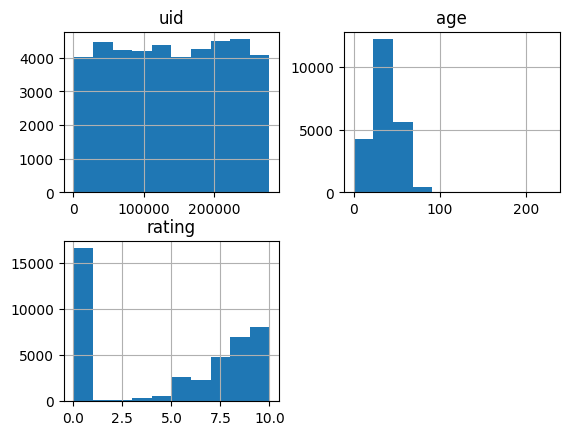

In [5]:
merged_dataset.hist()
plt.show()

Group by location, find mean on the rating

In [6]:
grouped_by_location = merged_dataset.groupby('location', as_index=False).count()
grouped_by_location

,location,uid,age,isbn,rating
0,"&#321;ód&#378;, &#322;ódzkie, poland",1,1,1,1
1,"&#36149;&#28207;, &#24191;&#35199;, china",1,1,1,1
2,", ,",2,0,2,2
3,", , belize",1,0,1,1
4,", , canada",4,0,4,4
...,...,...,...,...,...
10405,"zürich, zh, switzerland",1,1,1,1
10406,"århus, n/a, denmark",1,1,1,1
10407,"óbidos, connecticut, portugal",1,1,1,1
10408,"örebro, n/a, sweden",1,1,1,1


In [7]:
sample = grouped_by_location.sample(n=1000)
sample

,location,uid,age,isbn,rating
10279,"worthington, pennsylvania, usa",2,2,2,2
8073,"san leandro, california, usa",12,6,12,12
6736,"ojai, ,",2,0,2,2
6605,"northwood, middlesex, united kingdom",1,0,1,1
5327,"macon, georgia, usa",9,6,9,9
...,...,...,...,...,...
8393,"sherwood, oregon, usa",3,1,3,3
3958,"hermitage, tennessee, usa",3,3,3,3
4286,"invercargill, southland, new zealand",3,2,3,3
8457,"sinton, texas, usa",1,0,1,1


We take only 10 locations to test

In [8]:
locations = sample['location'].tolist()
locations


['worthington, pennsylvania, usa',
 'san leandro, california, usa',
 'ojai, ,',
 'northwood, middlesex, united kingdom',
 'macon, georgia, usa',
 'woodbine, maryland, usa',
 'chanute, kansas, usa',
 'williamsport, pennsylvania, usa',
 'morges, vaud, switzerland',
 'hutchinson, minnesota, usa',
 'gerroa, new south wales, australia',
 'godalming, surrey, united kingdom',
 'mont albert, victoria, australia',
 'toledo, ohio, canada',
 'republic, washington, usa',
 'washago, ontario, canada',
 'phenix city, alabama, usa',
 'fairfield county, connecticut, usa',
 'morro del jable, las palmas de gran canaria, spain',
 'springdale, pennsylvania, usa',
 'ithaca/trumansburg, new york, usa',
 'st. catharines, ontario, canada',
 'syraucse, new york, usa',
 'indpls, indiana, usa',
 'vermilion, alberta, canada',
 'woodbridge, virginia, usa',
 'northville, ,',
 'rawalpindi, n/a, pakistan',
 'fayetteville, new york,',
 'griffith, indiana, usa',
 'washington, missouri, usa',
 'cirencester, gloucestershi

In [9]:
locations_dataframe = pd.DataFrame(columns=['location', 'mean_rating'])
for location in locations:
    temp_dataframe = merged_dataset[merged_dataset['location'] == location]
    mean_rating = temp_dataframe['rating'].mean()
    locations_dataframe.loc[len(locations_dataframe.index)] = [location, mean_rating]
    
locations_dataframe

,location,mean_rating
0,"worthington, pennsylvania, usa",0.000000
1,"san leandro, california, usa",6.000000
2,"ojai, ,",10.000000
3,"northwood, middlesex, united kingdom",0.000000
4,"macon, georgia, usa",2.777778
...,...,...
995,"sherwood, oregon, usa",0.000000
996,"hermitage, tennessee, usa",2.666667
997,"invercargill, southland, new zealand",8.000000
998,"sinton, texas, usa",9.000000
